In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model , load_model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras import backend as K
import math
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")

In [3]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [4]:
X_train=train.drop(labels = ["label"],axis = 1) 
Y_train=train['label']
print(X_train.shape)
print(Y_train.shape)

(42000, 784)
(42000,)


In [5]:
X_train=X_train.astype('float32')/255
test=test.astype('float32')/255

In [6]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [7]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [8]:
Y_train.shape

(42000, 10)

In [9]:
print(Y_train[:5])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [10]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

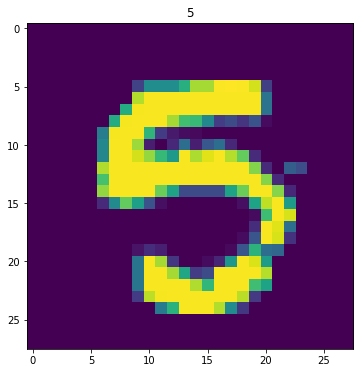

In [11]:
plt.figure(figsize=(6,6))
plt.imshow(X_train[1][:,:,0])
plt.title(Y_train[1].argmax());

In [12]:
inputShape=(28,28,1)
input = Input(inputShape)

x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv1',padding='same')(input)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool1')(x)



x = Conv2D(64,(3,3),strides = (1,1),name='layer_conv2',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool2')(x)

x = Conv2D(32,(3,3),strides = (1,1),name='conv3',padding='same')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((2,2),name='maxPool3')(x)


x = Flatten()(x)
x = Dense(64,activation = 'relu',name='fc0')(x)
x = Dropout(0.25)(x)
x = Dense(32,activation = 'relu',name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(10,activation = 'softmax',name='fc2')(x)

model = Model(inputs = input,outputs = x,name='Predict')

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [14]:
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally 
    height_shift_range=0.2,# randomly shift images vertically 

    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

In [15]:
momentum = 0.5
sgd = SGD(lr=0.01, momentum=momentum, decay=0.0, nesterov=False) 

# compile the model
model.compile(loss='categorical_crossentropy',optimizer=sgd, metrics=['accuracy'])

In [18]:
import math
def step_decay(epoch):
    
    
    initial_lrate=0.1
    drop=0.6
    epochs_drop = 3.0
    lrate= initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
    return lrate
   

lrate = LearningRateScheduler(step_decay)
callbacks_list = [ lrate]

In [19]:
history=model.fit(X_train, Y_train, validation_data=(X_valid, Y_valid),
                          epochs=35,callbacks=callbacks_list,verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/35
37800/37800 [==============================] - 186s 5ms/step - loss: 0.3702 - acc: 0.8846 - val_loss: 0.1176 - val_acc: 0.9698
Epoch 2/35
37800/37800 [==============================] - 179s 5ms/step - loss: 0.1294 - acc: 0.9664 - val_loss: 0.1437 - val_acc: 0.9626
Epoch 3/35
37800/37800 [==============================] - 170s 4ms/step - loss: 0.0756 - acc: 0.9807 - val_loss: 0.0540 - val_acc: 0.9869
Epoch 4/35
37800/37800 [==============================] - 166s 4ms/step - loss: 0.0626 - acc: 0.9838 - val_loss: 0.0458 - val_acc: 0.9888
Epoch 5/35
37800/37800 [==============================] - 168s 4ms/step - loss: 0.0529 - acc: 0.9866 - val_loss: 0.0504 - val_acc: 0.9898
Epoch 6/35
37800/37800 [==============================] - 169s 4ms/step - loss: 0.0379 - acc: 0.9899 - val_loss: 0.0400 - val_acc: 0.9888
Epoch 7/35
37800/37800 [==============================] - 168s 4ms/step - loss: 0.0302 - acc: 0.9920 - val_loss: 0.0433 - v

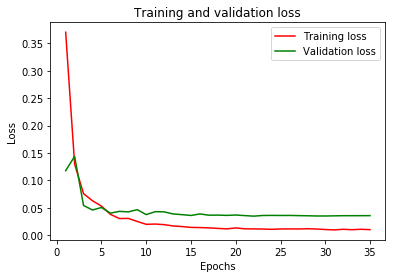

In [20]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

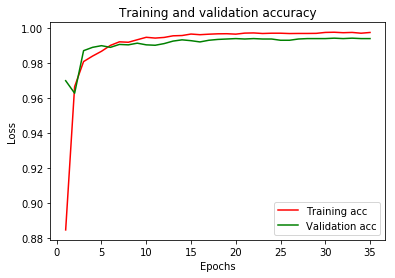

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
print("on valid data")
pred1=model.evaluate(X_valid,Y_valid)
print("accuaracy", str(pred1[1]*100))
print("Total loss",str(pred1[0]*100))

on valid data
4200/4200 [==============================] - 4s 962us/step
accuaracy 99.38095238095238
Total loss 3.5536497280225463


In [23]:
results = model.predict(test)
results = np.argmax(results,axis = 1)

In [24]:
submissions=pd.DataFrame({"ImageId": list(range(1,len(results)+1)),
                         "Label": results})
submissions.to_csv("submission.csv", index=False, header=True)

In [25]:
model.save('mnist_1.h5')

In [21]:
model = load_model('mnist_1.h5')

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 28, 28, 64)        640       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
maxPool1 (MaxPooling2D)      (None, 14, 14, 64)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 14, 14, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
__________

In [46]:
layer_outputs = [layer.output for layer in model.layers]
layer_outputs = layer_outputs[1:]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(X_train[10].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

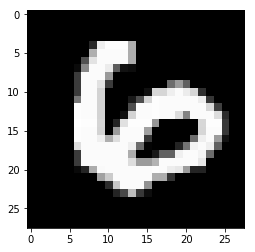

In [20]:
plt.imshow(X_train[10][:,:,0],cmap='gray');

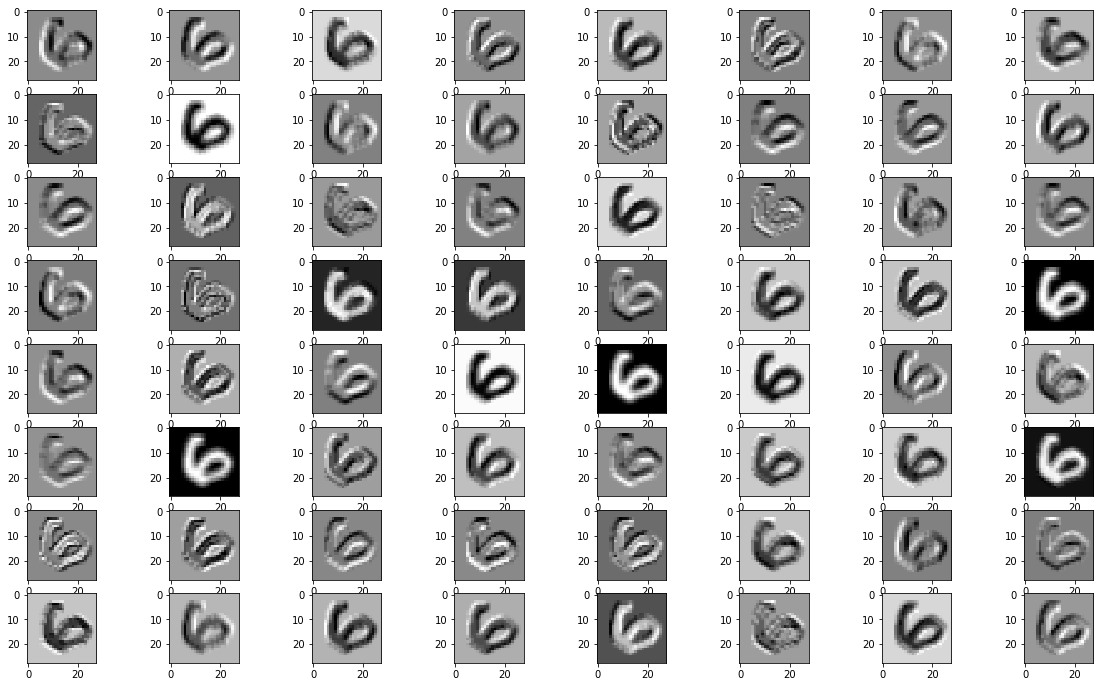

In [36]:
display_activation(activations, 8, 8, 1)

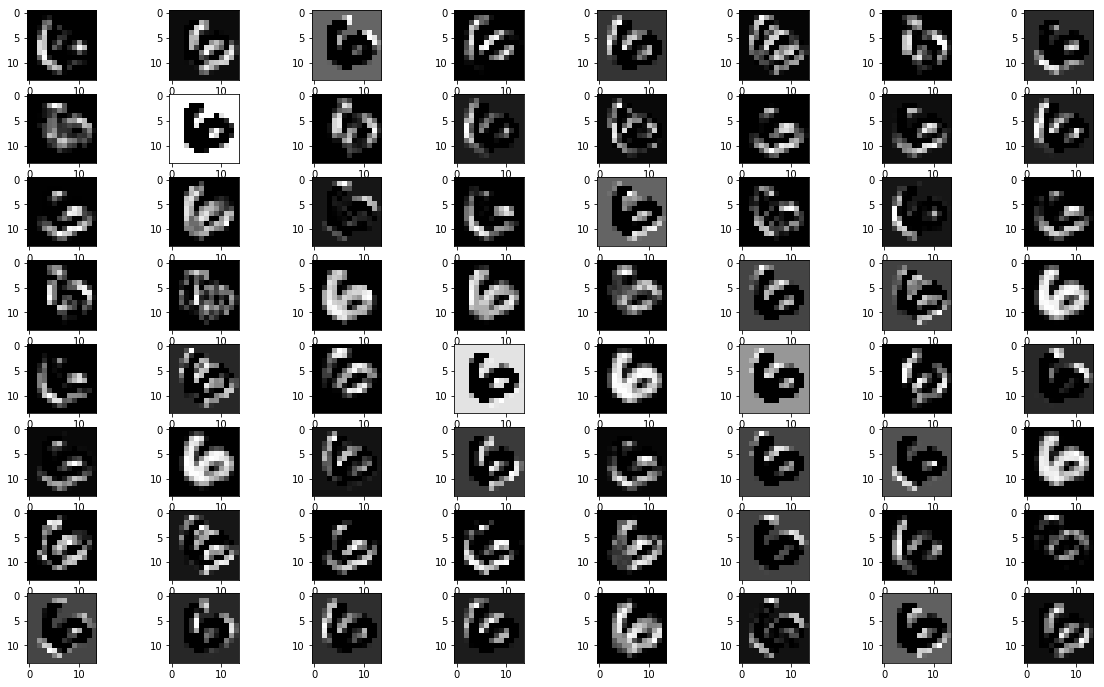

In [37]:
display_activation(activations, 8, 8, 3)

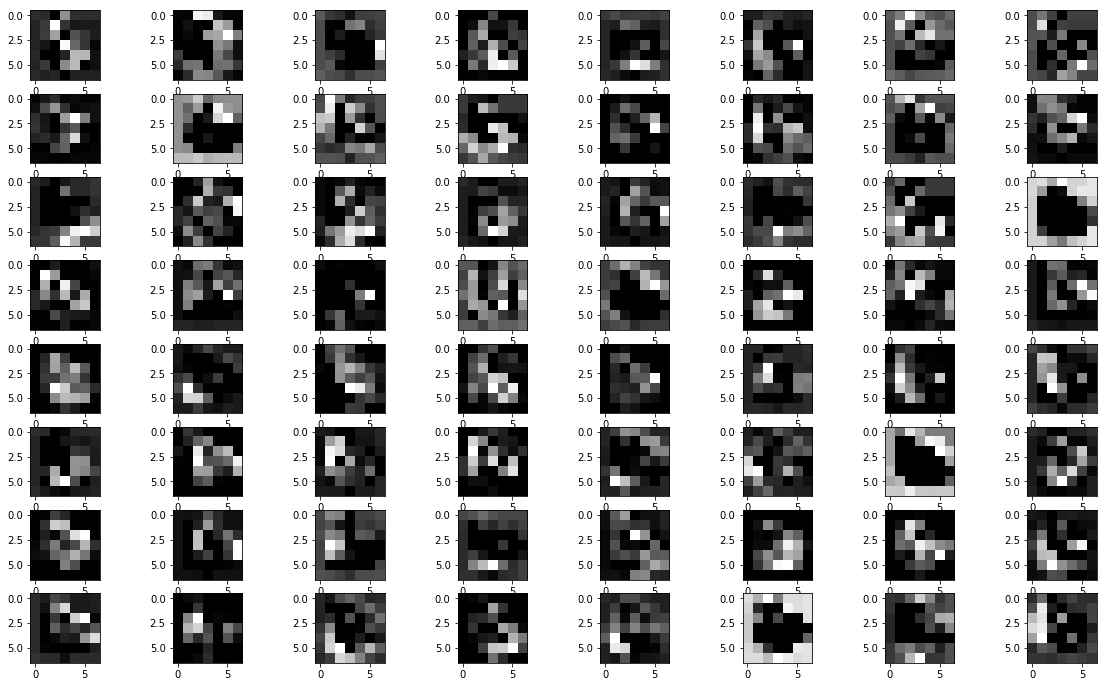

In [38]:
display_activation(activations, 8, 8, 7)

In [39]:
len(activations)

18

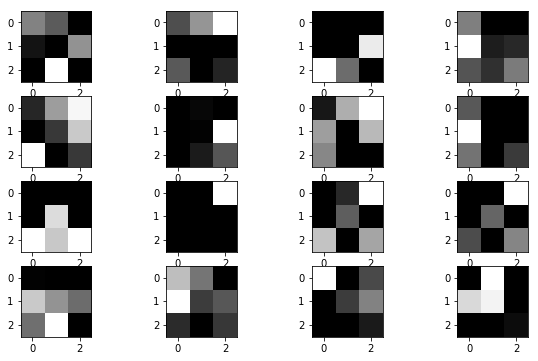

In [44]:
display_activation(activations, 4, 4, 11)

Exception ignored in: <bound method BaseSession._Callable.__del__ of <tensorflow.python.client.session.BaseSession._Callable object at 0x7f81473ea5c0>>
Traceback (most recent call last):
  File "/home/parth/.local/lib/python3.6/site-packages/tensorflow/python/client/session.py", line 1455, in __del__
    self._session._session, self._handle, status)
  File "/home/parth/.local/lib/python3.6/site-packages/tensorflow/python/framework/errors_impl.py", line 528, in __exit__
    c_api.TF_GetCode(self.status.status))
tensorflow.python.framework.errors_impl.InvalidArgumentError: No such callable handle: 322766416


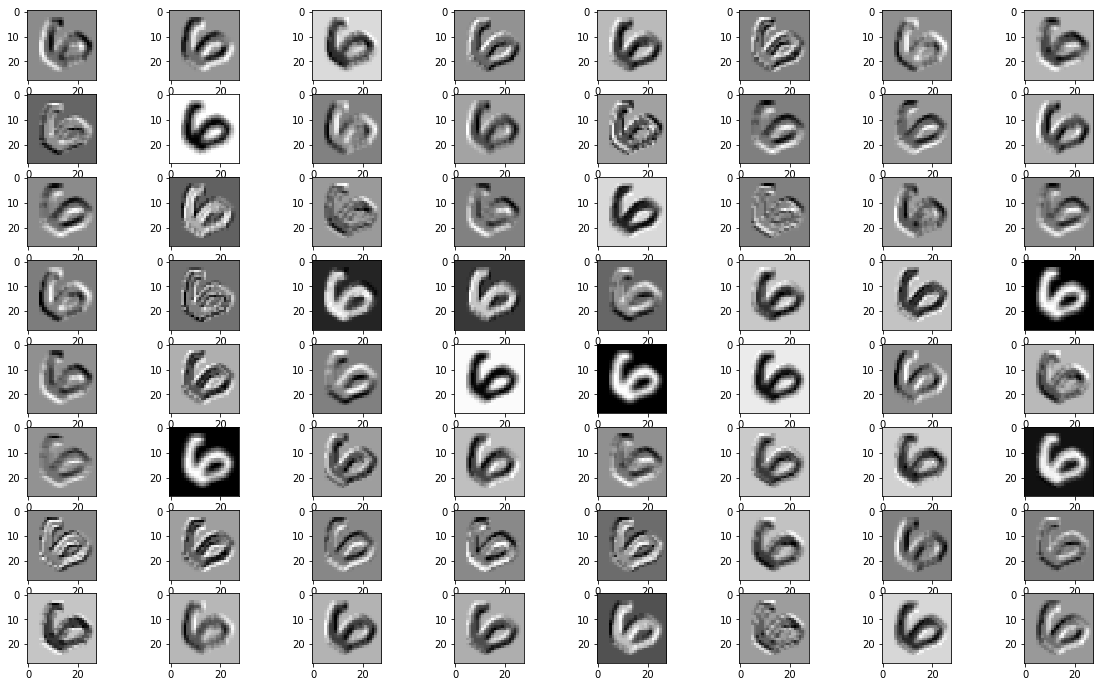

In [42]:
display_activation(activations, 8, 8, 0)

In [23]:
layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

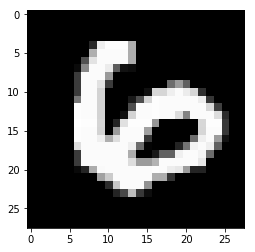

In [16]:
plt.imshow(X_train[10][:,:,0],cmap='gray')

In [17]:
import cv2 as cv
cv.imshow('image',X_train[10][:,:,0])
cv.waitKey(0)
cv.destroyAllWindows()

In [19]:
np.max(X_train[:,:,0])

0.8392157

In [34]:
conv1_layer_weights = np.asarray(layer_dict['layer_conv1'].get_weights()[0])

In [43]:
conv1_layer_weights[:,:,:,0].shape

(3, 3, 1)

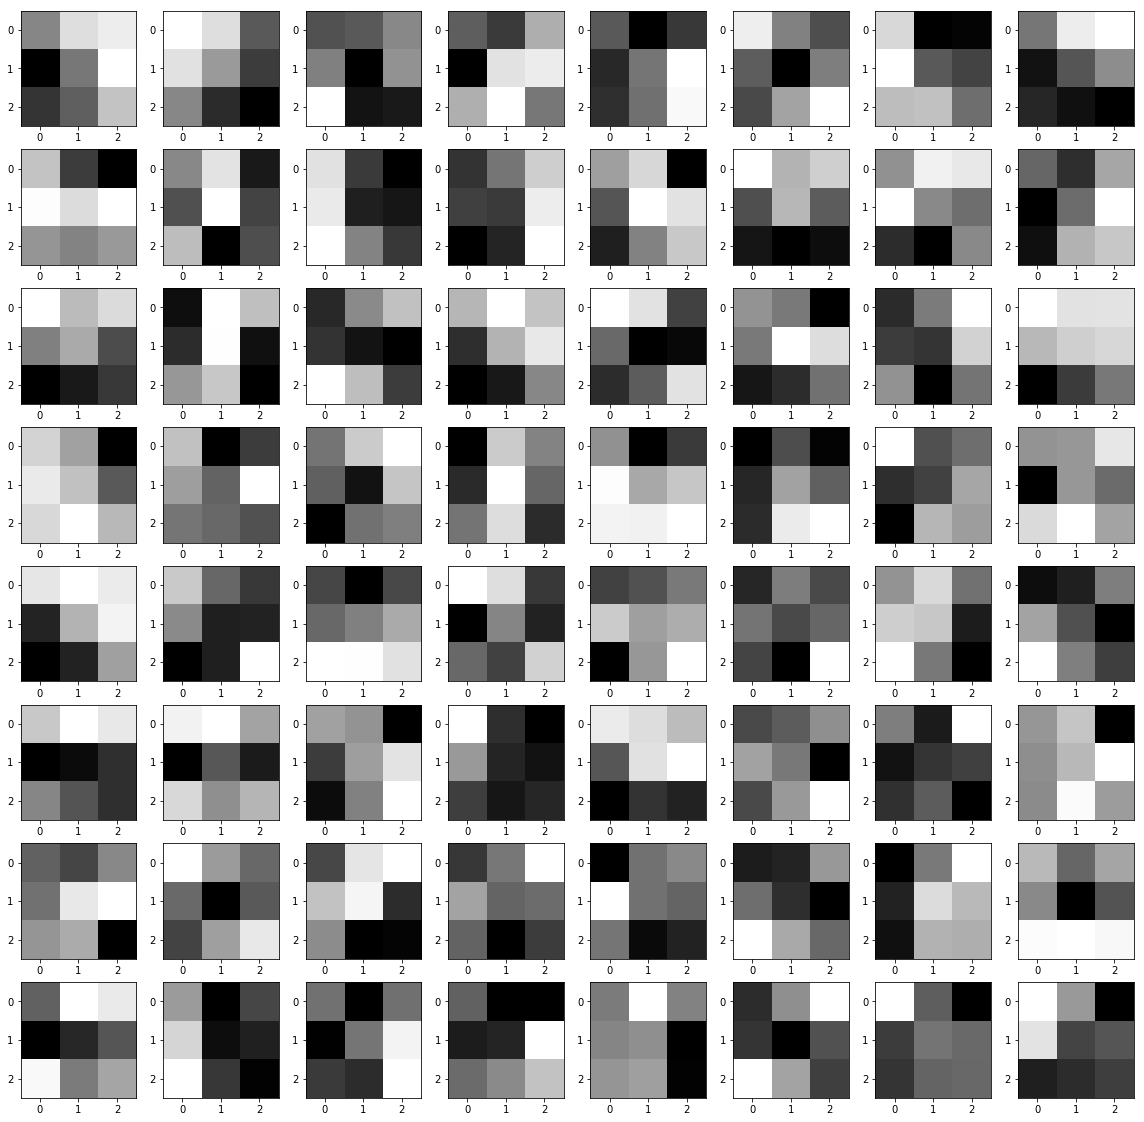

In [45]:
fig, ax = plt.subplots(8, 8, figsize=(8*2.5,8*2.5))
activation_index = 0
for i in range(8):
    for j in range(8):
        ax[i][j].imshow(conv1_layer_weights[:, :, 0, activation_index], cmap='gray')
        activation_index+=1

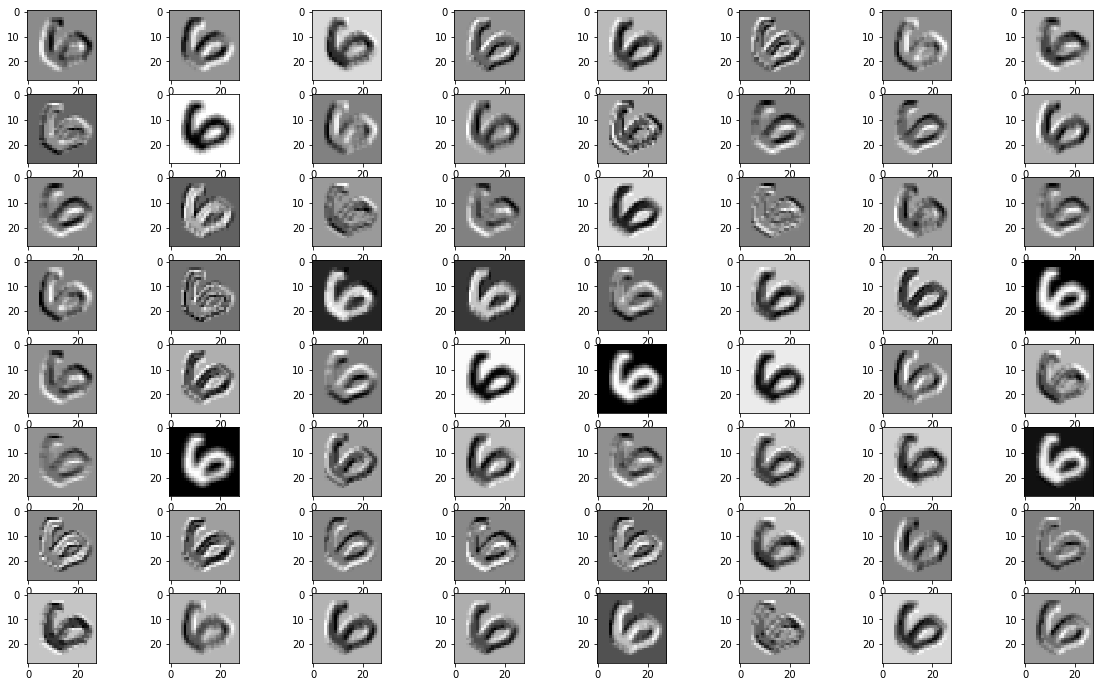

In [49]:
display_activation(activations,8,8,0)

IndexError: index 64 is out of bounds for axis 3 with size 64

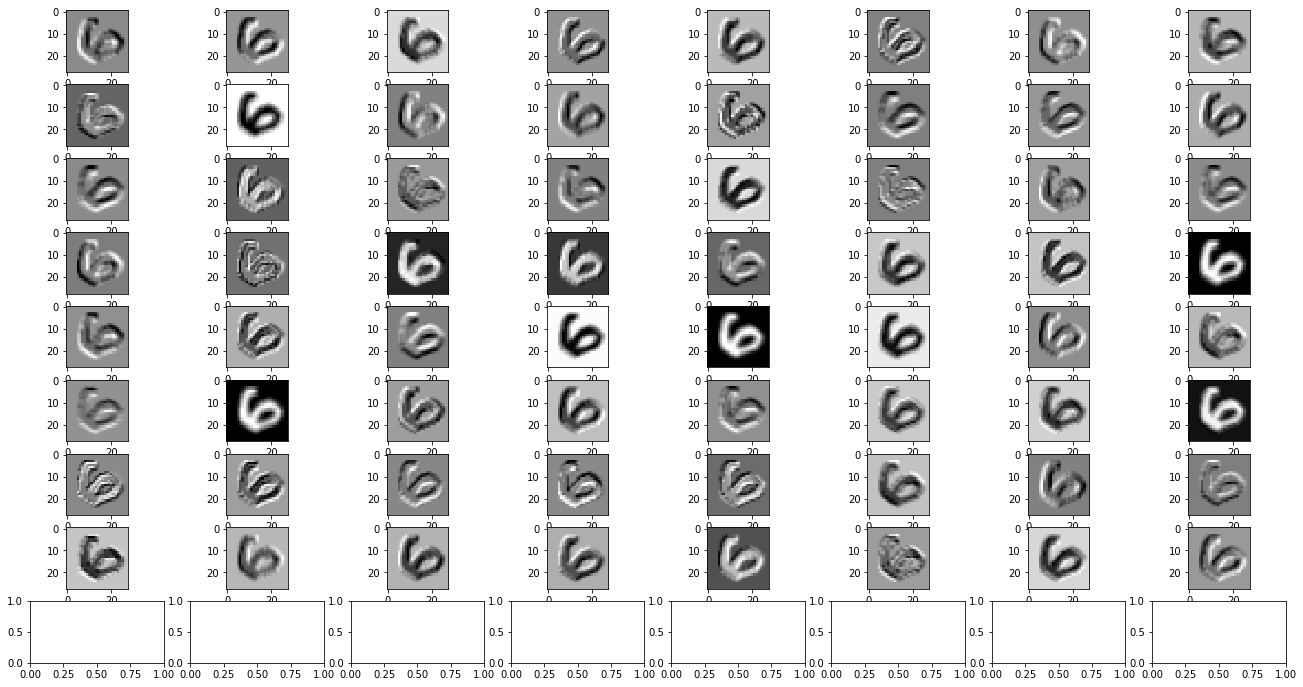

In [50]:
display_activation(activations,8,9,0)